<div style="border:solid green 3px; padding: 20px">
																							
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Изучение общей информации

#### Импорт библиотек и чтение файла.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/data/real_estate_data.csv', sep='\t')

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

#### Вывод первых 20 строк датафрейма.

In [3]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для вывода таблиц лучше использовать функцию display
</div>

#### Вывод основной информации о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1.4 Гистограммы для всех столбцов таблицы.

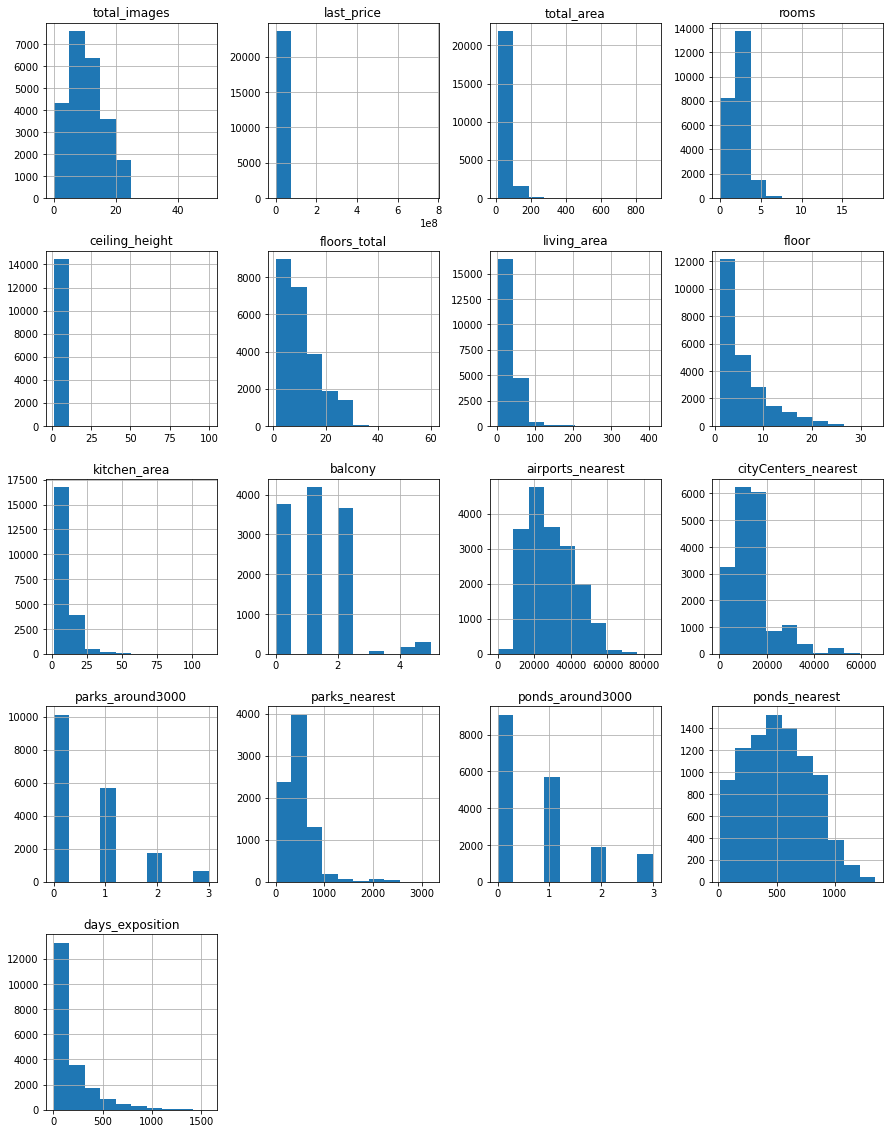

In [5]:
axes = data.hist(figsize=(15, 20))

for ax in axes.flatten():
    ax.set_title(ax.get_title())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Если тебе так будет удобнее, то можно создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

#### Изучение уникальных значений в столбце с названиями и устранение неявных дубликатов. 

Первым делом приведем названия местности в данных в единый формат, так как этот столбец нам понадобится для других задач предобработки.

Посмотрим все уникальные значения в столбце:

In [6]:
data.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Как видно из списка уникальных значений, некоторые названия местностей написаны по разному, что может в результате привести к ошибочной интерпретации данных во время анализа.

Приведение всех наименований местностей в единый формат:

In [7]:
# Функция для приведения к единому формату
def normalize_locality_name(name):
    if isinstance(name, str):
        # Замена 'поселок' на 'посёлок'
        name = name.replace('поселок', 'посёлок')
        # Удаление ' городского типа', 'городской ', 'коттеджный '
        name = name.replace(' городского типа', '')
        name = name.replace('городской ', '')
        name = name.replace('коттеджный ', '')
    return name

# Применение функции к столбцу locality_name
data['locality_name'] = data['locality_name'].apply(normalize_locality_name)

Проверка наименований местностей:

In [8]:
data.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### Обработка пропущенных значений

Проверка столбцов с пустыми значениями

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

По столбцам floors_total и locality_name можно удалить строки, в которых есть пропуски, так как их немного и удаление не сильно повлияет на общую картину данных.

In [10]:
data = data.dropna(subset=['floors_total', 'locality_name'])

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Удалить пропуски в этих столбцах - это хорошее решение. 
</div>

В столбце balcony пропуски можно заменить на 0, если предположить, что незаполненные данные о балконах подразумевает их отсутствие. Также можно поступить с большинством столбцов с большим количеством пропусков:
- Пропуски в столбце is_apartment можно заменить на False, так как апартаменты являются особым типом жилья, и если значение не указано, то, вероятно, это обычная квартира.
- В столбцах parks_around3000 и ponds_around3000 пропуски можно заменить на 0, если предполагается, что отсутствие данных означает отсутствие парков или водоёмов в указанном радиусе.

Замена пустых значений в столбцах balcony, is_apartment, parks_around3000, ponds_around3000:

In [11]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Столбец ceiling_height можно заполнить медианным значением по столбцу. Медиана часто используется, когда данные могут содержать выбросы.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

Заполннить пропуски в столбцах living_area и kitchen_area можно средним процентом от total_area — это вполне обоснованный подход. Этот метод учитывает соотношение жилой площади и площади кухни относительно общей площади, что делает его более точным по сравнению с простым средним значением по всем данным.

In [13]:
# Вычисление среднего процента для living_area и kitchen_area
mean_living_area_percentage = (data['living_area'] / data['total_area']).mean()
mean_kitchen_area_percentage = (data['kitchen_area'] / data['total_area']).mean()

# Функция для заполнения пропусков в living_area
def fill_living_area(row):
    if pd.isnull(row['living_area']):
        return row['total_area'] * mean_living_area_percentage
    return row['living_area']

# Функция для заполнения пропусков в kitchen_area
def fill_kitchen_area(row):
    if pd.isnull(row['kitchen_area']):
        return row['total_area'] * mean_kitchen_area_percentage
    return row['kitchen_area']

# Применение функций для заполнения пропусков
data['living_area'] = data.apply(lambda row: fill_living_area(row), axis=1)
data['kitchen_area'] = data.apply(lambda row: fill_kitchen_area(row), axis=1)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

Можно вычислить медианные значения для столбцов airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest в зависимости от locality_name. Таким образом, мы учтем особенности разных населенных пунктов и будем иметь более точные значения для замены пропусков.

In [14]:
# Функция для заполнения пропусков медианными значениями по locality_name
def fill_missing_by_median(df, column, group_by='locality_name'):
    # Вычисляем медиану по группам
    medians = df.groupby(group_by)[column].median()
    # Заполняем пропуски медианой соответствующей группы
    df[column] = df.apply(lambda row: medians[row[group_by]] if pd.isnull(row[column]) else row[column], axis=1)

# Заполнение пропусков по медианным значениям для каждого населенного пункта
columns_to_fill = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']

for column in columns_to_fill:
    fill_missing_by_median(data, column)

Проверка проделанной работы со столбцами с пустыми значениями

In [15]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5432
cityCenters_nearest     5432
parks_around3000           0
parks_nearest           5986
ponds_around3000           0
ponds_nearest           5517
days_exposition         3171
dtype: int64

В столбцах airports_nearest, cityCenters_nearest, parks_nearest, и ponds_nearest остались пустые значения после заполнения медианными значениями по locality_name. Это может быть связано с тем, что в некоторых населённых пунктах не было заполнено ни одного значения в этих столбцах или они уникальны и не повторяются. Также, возможно, в некоторых поселках нет центра города, аэропорта, парка или озера.

Для проверки посмотрим количество уникальных значений в locality_name, которые встречаются только один раз и имеют пропуски в указанных столбцах.

In [16]:
import pandas as pd

# Создание пустого DataFrame для хранения результатов
results = pd.DataFrame(columns=['locality_name', 'unique_count'] + columns_to_fill)

# Заполнение данными
for locality in data['locality_name'].unique():
    if pd.notna(locality):  # Исключаем NaN
        row = {'locality_name': locality}
        row['unique_count'] = data[data['locality_name'] == locality].shape[0]  # Количество записей по locality_name
        
        for col in columns_to_fill:
            na_count = data[data['locality_name'] == locality][col].isna().sum()
            row[col] = na_count
        
        results = pd.concat([results, pd.DataFrame([row])], ignore_index=True)

# Создание пустого словаря для хранения результатов
results_summary = {}

# Заполнение данными
for col in columns_to_fill:
    count_single_locality = results[(results['unique_count'] == 1) & (results[col] == 1)].shape[0]
    results_summary[col] = count_single_locality

# Вывод результатов
print("Количество locality_name с единственной записью и пропусками:")
for col, count in results_summary.items():
    print(f"{col}: {count}")


Количество locality_name с единственной записью и пропусками:
airports_nearest: 85
cityCenters_nearest: 85
parks_nearest: 88
ponds_nearest: 86


Обработка пустых значений — важный этап подготовки данных для анализа. Важно заполнить или заменить пропущенные данные, либо корректно интерпретировать их, если заполнение невозможно.

Мы удалили строки с пропусками в столбцах floors_total и locality_name, так как их немного и удаление не повлияет на общую картину данных. В столбце balcony пропуски заменены на 0, предполагая, что отсутствие данных о балконах означает их отсутствие. Аналогично обработаны столбцы is_apartment, parks_around3000 и ponds_around3000.

Столбцы ceiling_height и days_exposition заполнены медианным значением по соответствующим столбцам. Столбцы living_area и kitchen_area заполнены значениями, рассчитанными как средний процент от total_area. Для столбцов airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest вычислены и применены медианные значения по locality_name, учитывая особенности разных населенных пунктов.

Однако в столбцах airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest остались пустые значения. Это может быть связано с тем, что в некоторых населенных пунктах отсутствуют соответствующие объекты, либо эти пункты уникальны и не имеют повторяющихся данных. Пустые значения по этим столбцам оставим, и учтем при анализе.

Причины пропусков в данных могут быть разнообразными:
- Человеческий фактор: Ошибки и пропуски при заполнении данных вручную.
- Технические сбои: Проблемы с системами автоматизированного сбора и хранения данных.
- Несогласованность данных: Разные стандарты заполнения данных в разных источниках или организациях.
Эти причины помогают лучше понять и интерпретировать пропуски в данных, а также выбрать наиболее подходящие методы их обработки.

#### Исправление типов данных

При сопоставлении описании данных и типов данных столбцов можно увидеть несходство типов некоторых данных с описанием.
Для сравнения заново посмотрим на типы данных столбцов:

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Переменные, которые указывают количество в целых числах, такие как число балконов или этажей в здании, должны иметь тип `int`, а не `float`. Эти данные по своему характеру являются целыми числами.

Переменные для преобразования:
- `balcony` — число балконов (float => int)
- `floors_total` — всего этажей в доме (float => int)
- `parks_around3000` — число парков в радиусе 3 км (float => int)
- `ponds_around3000` — число водоёмов в радиусе 3 км (float => int)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия) (float => int)

Цены на квартиры — суммы большие и не имеют копеек, поэтому также можно заменить тип `float` на `int`.

Переменная для преобразования:
- `last_price` — цена на момент снятия с публикации (float => int)

Для анализа данных с датой лучше перевести в тип `datetime`.

Переменная для преобразования:
- `first_day_exposition` — дата публикации (str => datetime)

In [18]:
# Преобразование к целым числам с сохранением NaN значений
columns_to_int = ['balcony', 'floors_total', 'parks_around3000', 'ponds_around3000', 'days_exposition']

for column in columns_to_int:
    data[column] = data[column].apply(lambda x: pd.NA if pd.isna(x) else int(x)).astype('Int64')

# Преобразование к типу datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Для проверки исправленных типов значений посмотрим на типы данных столбцов ещё раз:

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

### Добавьление в таблицу новых столбцов

Для анализа данных нужно расчитать дополнительные столбцы:
- цена одного квадратного метра 
- день недели публикации объявления 
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры 
- расстояние до центра города в километрах 

In [20]:
# Расчет цены за кв. м и перевод расстояние до центра в км
data['price_per_m2'] = data['last_price'] / data['total_area']
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

In [21]:
# Работа с датами
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [22]:
# Функция для определения типа этажа
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
# Добавление нового столбца с типом этажа
data['floor_type'] = data.apply(floor_type, axis=1)

In [23]:
# Разделим цены на 1 млн для удобства
data['last_price_mln'] = data['last_price'] / 1000000

Для проверки корректности добавленных столбцов выведим первые 5 строк:

In [24]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,cityCenters_nearest_km,day_of_week,month,year,floor_type,last_price_mln
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,<NA>,120370.370370,16.028,3,3,2019,другой,13.000
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,584.5,81,82920.792079,18.603,1,12,2018,первый,3.350
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574.0,558,92785.714286,13.933,3,8,2015,другой,5.196
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.825011,9,False,...,3,234.0,424,408176.100629,6.800,4,7,2015,другой,64.900
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121,100000.000000,8.098,1,6,2018,другой,10.000


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Исследовательский анализ данных

#### Исследование столбцов со значениями на наличие аномалий и выбросов.

Изучим столбцы со значениями. Как они распределены и имеют ли аномалии?
При наличии выбросов будем использовать метод межквартильного размаха (IQR) в качестве рекомендации порога отсечения данных при очистки выбросов.

In [25]:
# Функция для расчета IQR
def calculate_iqr_bounds(column):
    # Вычисление IQR
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    # Определение границ выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

##### Общая площадь

In [26]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

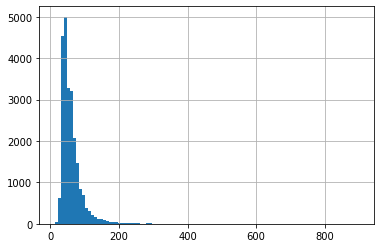

In [27]:
data['total_area'].hist(bins=100)

Из описательной статистики и гистограммы видно, что распределение общей площади (total_area) имеет длинный хвост справа, что указывает на наличие выбросов. Данные нужно очистить от выбросов

In [28]:
total_area_bounds = calculate_iqr_bounds(data['total_area'])
print(total_area_bounds)
count = data[data['total_area'] > total_area_bounds[1]].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

(-4.550000000000004, 114.25)
1239, 5.26%


Функция calculate_iqr_bounds расчитала вверхний предел данных на уровне 109 м2. При очистки данных потеряем 1239 строк (5.26%) от данных. Проверим уровень верхней границы 150, для сохранения большего объема данных.

In [29]:
count = data[data['total_area'] > 150].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

561, 2.38%


count    23004.000000
mean        56.523525
std         22.931926
min         12.000000
25%         40.000000
50%         51.000000
75%         67.700000
max        150.000000
Name: total_area, dtype: float64
Количество строк в таблице filtered_data: 23004


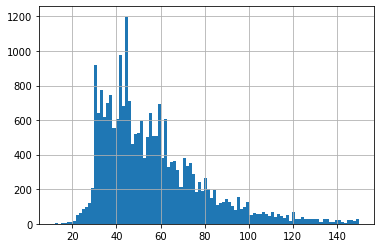

In [30]:
filtered_data = data[data['total_area'] <= 150]
print(filtered_data['total_area'].describe())
filtered_data ['total_area'].hist(bins=100)
print('Количество строк в таблице filtered_data:', filtered_data.shape[0])

##### Жилая площадь

In [31]:
data['living_area'].describe()

count    23565.000000
mean        34.561001
std         22.346039
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

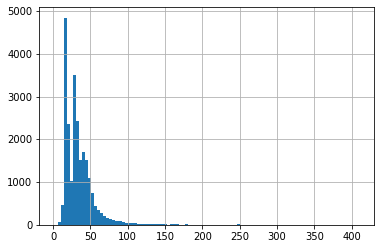

In [32]:
data['living_area'].hist(bins=100)

Также, как и с total_area, можно видеть длинный хвост справа. Также удалим выбромы методом IQR

In [33]:
# Расчет границ для очистки данных от выбросов
living_area_bounds = calculate_iqr_bounds(data['living_area'])
print(living_area_bounds)
count = data[data['living_area'] > living_area_bounds[1]].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

(-15.650000000000006, 76.75)
881, 3.74%


Потеря 881 строк (3,74%) также много, проверим поставить верхнюю границу на уровне 90.

In [34]:
count = data[data['living_area'] > 90].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

531, 2.25%


count    22909.000000
mean        32.043045
std         14.679017
min          2.000000
25%         18.800000
50%         30.000000
75%         41.000000
max         90.000000
Name: living_area, dtype: float64
Количество строк в таблице filtered_data: 22909


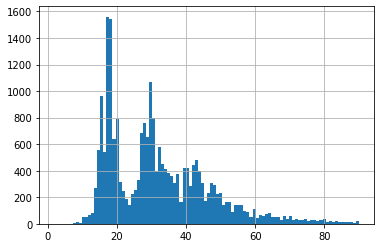

In [35]:
filtered_data = filtered_data[filtered_data['living_area'] <= 90]
print(filtered_data ['living_area'].describe())
filtered_data['living_area'].hist(bins=100)
print('Количество строк в таблице filtered_data:', filtered_data.shape[0])

##### Площадь кухни

In [36]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.565381
std          6.093199
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

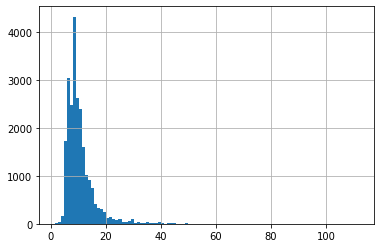

In [37]:
data['kitchen_area'].hist(bins=100)

Похожая ситуация с наличием выбросов справа.

In [38]:
# Расчет границ для очистки данных от выбросов
kitchen_area_bounds = calculate_iqr_bounds(data['kitchen_area'])
print(kitchen_area_bounds)
count = data[data['kitchen_area'] > kitchen_area_bounds[1]].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

(-0.5, 19.5)
1330, 5.64%


In [39]:
count = data[data['kitchen_area'] > 30].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

371, 1.57%


count    22713.000000
mean         9.866171
std          4.002670
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         30.000000
Name: kitchen_area, dtype: float64
Количество строк в таблице filtered_data: 22713


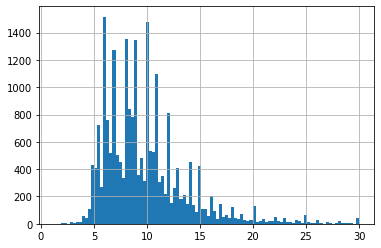

In [40]:
filtered_data = filtered_data[filtered_data['kitchen_area'] <= 30]
print(filtered_data ['kitchen_area'].describe())
filtered_data['kitchen_area'].hist(bins=100)
print('Количество строк в таблице filtered_data:', filtered_data.shape[0])

##### Изучение цены

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price_mln, dtype: float64


<AxesSubplot:>

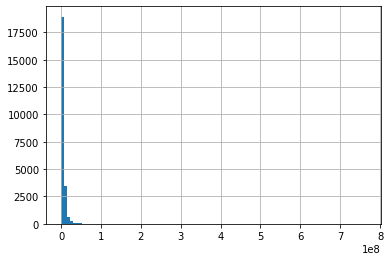

In [41]:
print(data['last_price_mln'].describe())
data['last_price'].hist(bins=100)

In [42]:
# Расчет границ для очистки данных от выбросов
last_price_bounds = calculate_iqr_bounds(data['last_price_mln'])
print(last_price_bounds)
count = data[data['last_price_mln'] > last_price_bounds[1]].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

(-1.685, 11.875)
2046, 8.68%


In [43]:
count = data[data['last_price_mln'] > 16].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

1058, 4.49%


count    22243.000000
mean         5.138982
std          2.717652
min          0.430000
25%          3.350000
50%          4.500000
75%          6.257500
max         16.000000
Name: last_price_mln, dtype: float64
Количество строк в таблице filtered_data: 22243


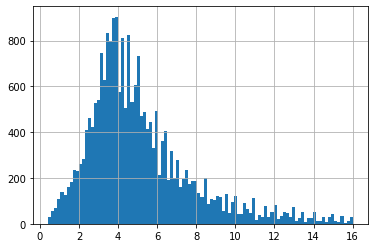

In [44]:
filtered_data = filtered_data[filtered_data['last_price_mln'] <= 16]
print(filtered_data ['last_price_mln'].describe())
filtered_data['last_price_mln'].hist(bins=100)
print('Количество строк в таблице filtered_data:', filtered_data.shape[0])

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

##### Количество комнат

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<AxesSubplot:>

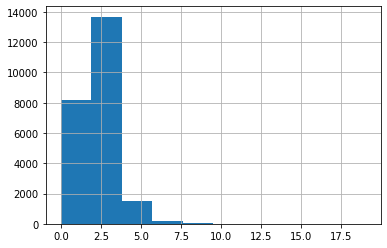

In [45]:
print(data['rooms'].describe())
data['rooms'].hist()

Можно увилить строки с 0 комнатами, такого быть не может. Можно предположить, что большинство таких домов это квартиры студии, и в объявлениях не были заполнены количество комнат. Такие значения можно заменить на 1 комнатные.

In [46]:
data['rooms'].replace(0, 1, inplace=True)
filtered_data['rooms'].replace(0, 1, inplace=True)

In [47]:
# Расчет границ для очистки данных от выбросов
rooms_bounds = calculate_iqr_bounds(data['rooms'])
print(rooms_bounds)
count = data[data['rooms'] > rooms_bounds[1]].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

(-2.0, 6.0)
90, 0.38%


По описательной статистике видно выбросы с большим количеством комнат. Такие дома скорее исключения из правил, и могут исказить анализ. По рекомендации метода IQR удалим строки объявлений свыше 6 комнат.

count    22240.000000
mean         1.970549
std          0.908655
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64
Количество строк в таблице filtered_data: 22240


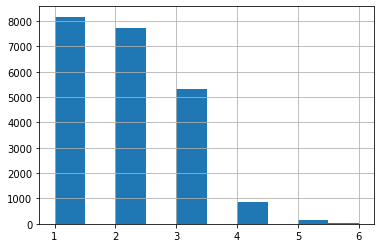

In [48]:
filtered_data = filtered_data[filtered_data['rooms'] <= 6]
print(filtered_data ['rooms'].describe())
filtered_data['rooms'].hist()
print('Количество строк в таблице filtered_data:', filtered_data.shape[0])

##### Изучение высоты потолков

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

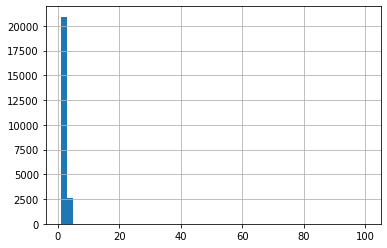

In [49]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=50)

Анализ показывает что есть аномальные показатели высоты потолков, вплоть до 100м. Посмотрим все уникальные значения в столбце.

In [50]:
data.sort_values(by='ceiling_height')['ceiling_height'].unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Итак, высота потолков в промежутке 20-32м явно указаны некорректно, с большей вероятностью они должны быть в промежутке 2-3.2м. Их можно разделить на 10, чтобы получить корректную высоту потолков. А вот значения в промежутках до 2м, 4.5-14м, а также 100м скорректировать не получиться и эти строки нужно удалить.

In [51]:
# Исправление высоты потолков
filtered_data.loc[(filtered_data['ceiling_height'] > 20) & (filtered_data['ceiling_height'] <= 32), 'ceiling_height'] /= 10
# Удаление строк с нереалистичными или некорректными высотами потолков
filtered_data = filtered_data.drop(filtered_data[(filtered_data['ceiling_height'] > 4.5) | (filtered_data['ceiling_height'] < 2.3)].index)

count    22210.000000
mean         2.679129
std          0.187540
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64
Количество строк в таблице filtered_data: 22210


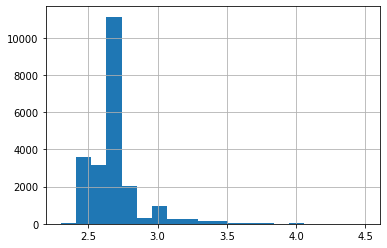

In [52]:
print(filtered_data['ceiling_height'].describe())
filtered_data['ceiling_height'].hist(bins=20)
print('Количество строк в таблице filtered_data:', filtered_data.shape[0])

##### Тип этажа квартиры

count      23565
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object


<AxesSubplot:>

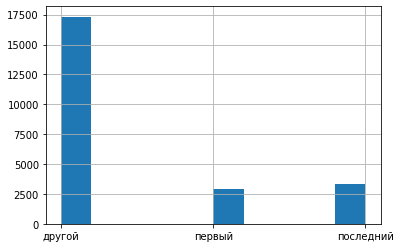

In [53]:
print(data['floor_type'].describe())
data['floor_type'].hist()

Гистограмма показывает распределение типов этажей. Категории включают “другой”, “первый” и “последний”. Наибольшее количество значений приходится на категорию “другой”, что указывает на её преобладание в данных.

##### Общее количество этажей в доме

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

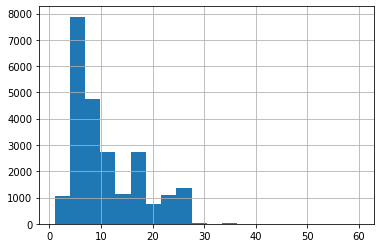

In [54]:
print(data['floors_total'].describe())
data['floors_total'].hist(bins=20)

На гистограме видны выбросы справа, на что указывает расстояние между Q3 и максимальным значением. Удалим эти строки.

In [55]:
# Расчет границ для очистки данных от выбросов
floors_total_bounds = calculate_iqr_bounds(data['floors_total'])
print(floors_total_bounds)
count = data[data['floors_total'] > floors_total_bounds[1]].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

(-11.5, 32.5)
32, 0.14%


count    22179.000000
mean        10.755760
std          6.574215
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64
Количество строк в таблице filtered_data: 22179


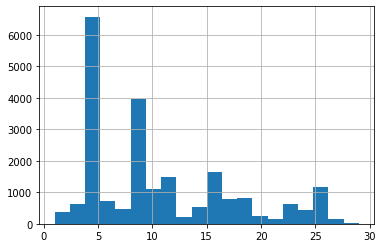

In [56]:
filtered_data = filtered_data[filtered_data['floors_total'] <= 30]
print(filtered_data ['floors_total'].describe())
filtered_data['floors_total'].hist(bins=20)
print('Количество строк в таблице filtered_data:', filtered_data.shape[0])

##### Расстояние до центра города в метрах

count    18133.000000
mean     14195.267882
std       8610.213514
min        181.000000
25%       9265.000000
50%      13073.000000
75%      16275.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


<AxesSubplot:>

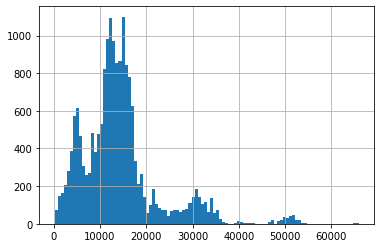

In [57]:
print(data['cityCenters_nearest'].describe())
data['cityCenters_nearest'].hist(bins=100)

In [58]:
# Расчет границ для очистки данных от выбросов
cityCenters_nearest_bounds = calculate_iqr_bounds(data['cityCenters_nearest'])
print(cityCenters_nearest_bounds)
count = data[data['cityCenters_nearest'] > cityCenters_nearest_bounds[1]].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

(-1250.0, 26790.0)
1735, 7.36%


In [59]:
count = data[data['cityCenters_nearest'] > 40000].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

301, 1.28%


count    16485.000000
mean     14064.358174
std       7145.004577
min        208.000000
25%      10123.000000
50%      13281.000000
75%      16280.000000
max      39936.000000
Name: cityCenters_nearest, dtype: float64
Количество строк в таблице filtered_data: 21885


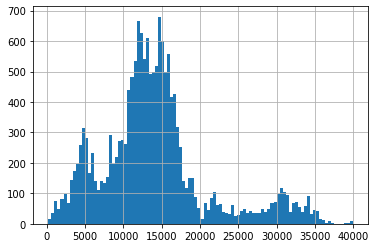

In [60]:
filtered_data = filtered_data[(filtered_data['cityCenters_nearest'] <= 40000) | (filtered_data['cityCenters_nearest'].isna())]
print(filtered_data ['cityCenters_nearest'].describe())
filtered_data['cityCenters_nearest'].hist(bins=100)
print('Количество строк в таблице filtered_data:', filtered_data.shape[0])

##### Расстояние до ближайшего парка

count    17579.000000
mean       475.895244
std        234.981831
min          1.000000
25%        433.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:>

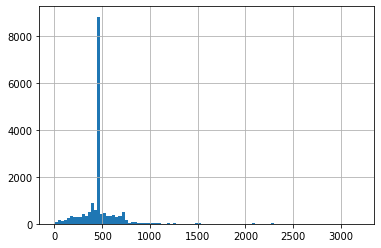

In [61]:
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=100)

In [62]:
# Расчет границ для очистки данных от выбросов
parks_nearest_bounds = calculate_iqr_bounds(data['parks_nearest'])
print(parks_nearest_bounds)
count = data[data['parks_nearest'] > parks_nearest_bounds[1]].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

(392.5, 500.5)
3701, 15.71%


In [63]:
count = data[data['parks_nearest'] > 850].shape[0]
percentage = (count / data.shape[0]) * 100
print(f'{count}, {percentage:.2f}%')

554, 2.35%


count    15452.000000
mean       450.048764
std        136.553694
min          1.000000
25%        439.000000
50%        460.000000
75%        460.000000
max        850.000000
Name: parks_nearest, dtype: float64
Количество строк в таблице filtered_data: 21393


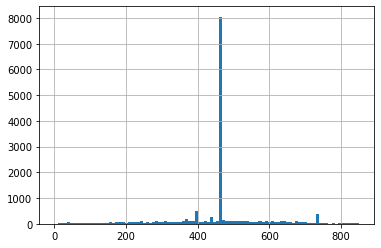

In [64]:
filtered_data = filtered_data[(filtered_data['parks_nearest'] <= 850) | (filtered_data['parks_nearest'].isna())]
print(filtered_data ['parks_nearest'].describe())
filtered_data['parks_nearest'].hist(bins=100)
print('Количество строк в таблице filtered_data:', filtered_data.shape[0])

Для проверки посмотрим какое количество данных нам пришлось удалить для очистки выбросов:

In [65]:
filtered_data.shape[0] / data.shape[0]

0.9078294080203692

#### Как быстро продавались квартиры?

count    18707.000000
mean       174.029882
std        212.345889
min          1.000000
25%         44.000000
50%         92.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

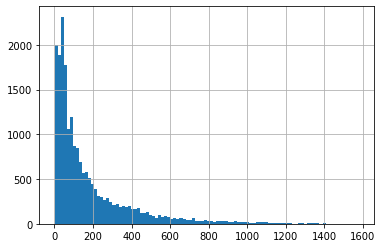

In [66]:
print(filtered_data['days_exposition'].describe())
data['days_exposition'].hist(bins=100)

Гистограмма показывает распределение количества дней, в течение которых объявления о продаже квартир были выставлены. Большинство значений сосредоточено в диапазоне до 200 дней, с несколькими выбросами, достигающими 1,580 дней.

В среднем продажа занимает около 164 дней.

Быстрые продажи: Продажи, которые занимают 45 дней или меньше (ниже 25-го процентиля).
Необычно долгие продажи: Продажи, которые занимают более 193 дней (выше 75-го процентиля).

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Факторы влияющие на стоимость объекта.

Следующим шагом является определение факторов, оказывающих наибольшее влияние на общую стоимость объектов недвижимости. Этот анализ поможет понять, какие параметры являются ключевыми для оценки стоимости и как они взаимодействуют между собой.

Для этого построим матрицу рассеивания и посмотрим в графике взаимосвязь показателей. Также, построим корреляционную матрицу и сделаем на его основе выводы по влиянию показателей. 

In [67]:
selected_columns = ['last_price', 'total_area', 'living_area', 'kitchen_area']
data_for_scatterplot = filtered_data[selected_columns]

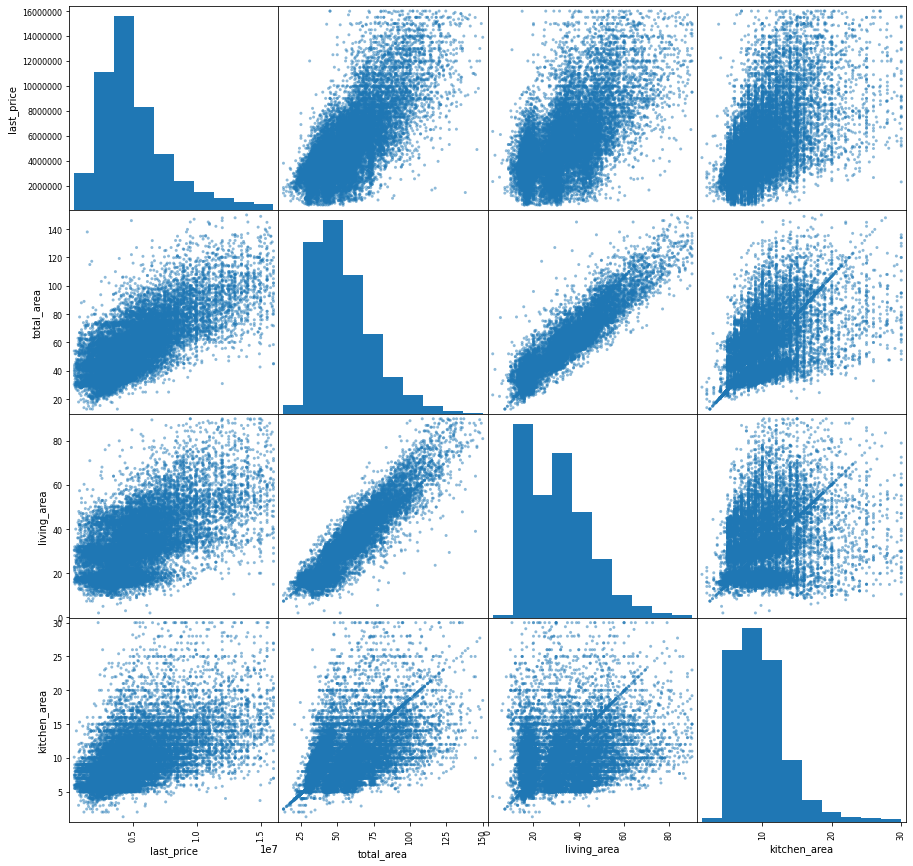

In [68]:
pd.plotting.scatter_matrix(data_for_scatterplot, figsize=(15, 15), diagonal='hist')
plt.show()

In [69]:
data_for_scatterplot.corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.741805,0.631389,0.554274
total_area,0.741805,1.000000,0.923452,0.534140
living_area,0.631389,0.923452,1.000000,0.286629
kitchen_area,0.554274,0.534140,0.286629,1.000000


Анализ зависимости цены от различных факторов показал, что наибольшее влияние на цену квартиры оказывает общая площадь, что подтверждается сильной положительной корреляцией и диаграммой рассеивания. Жилая площадь, площадь кухни и количество комнат также имеют умеренную положительную корреляцию с ценой, что указывает на их значительное, но менее выраженное влияние.

Корреляция и диаграммы рассеивания не позволяют нам увидеть прямую связь между категориальными факторами и ценой объекта. Для более точной оценки связи необходимо рассчитать медиану для каждого значения в соответствующем столбце.

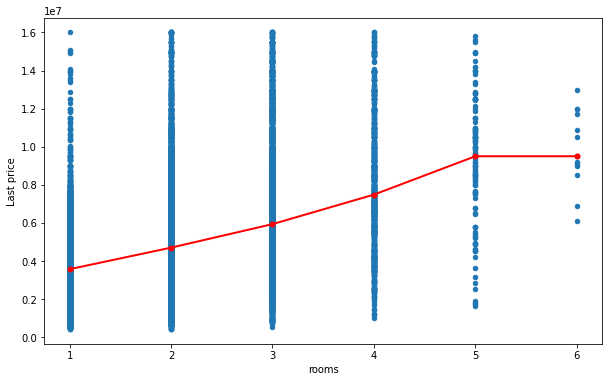

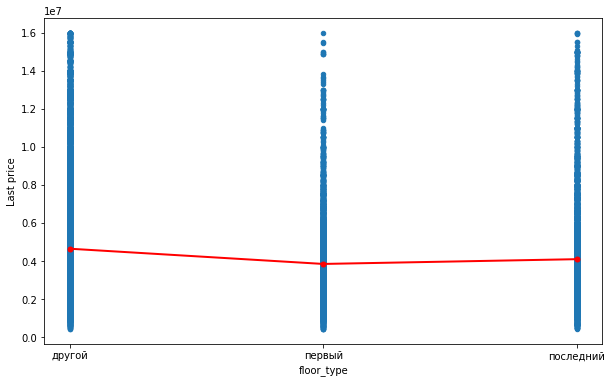

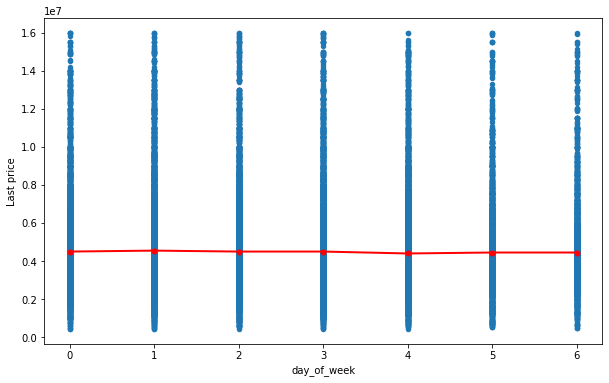

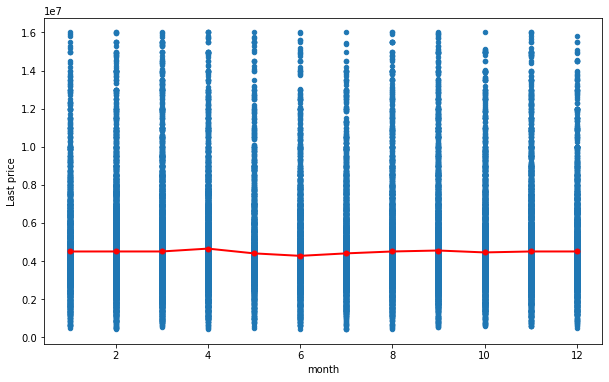

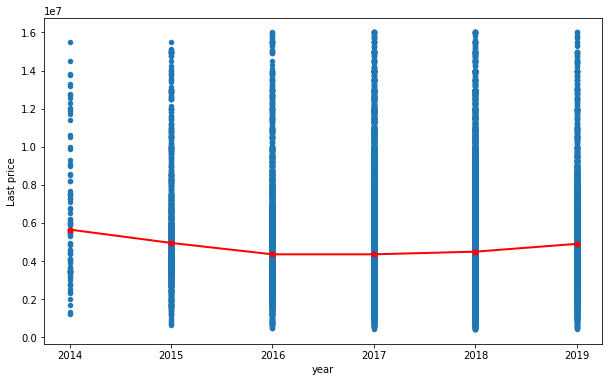

In [70]:
selected_columns = ['last_price', 'rooms', 'floor_type', 'day_of_week', 'month', 'year']
data_for_scatterplot = filtered_data[selected_columns]

for column in selected_columns[1:]:
    
    # Расчет медианы группировкой по столбцу
    median = data_for_scatterplot.groupby(column)['last_price'].median()
      
    # Построение графика
    ax = data_for_scatterplot.plot(
        kind='scatter',
        x=column,
        y='last_price',
        grid=True,
        figsize=(10, 6),
        xlabel=column,
        ylabel='Last price'
    )
    
    # Добавление линии медианной цены за квадратный метр
    median.plot(
        kind='line',
        x=column,
        y='median',
        color='red',
        ax=ax,
        marker='o',
        linewidth=2,
        markersize=5,
        label='Медианная цена'
    )
plt.show()

По графику показывающюю связь количества комнат с ценой можно увидеть умеренную положительную связь: цена квартиры растет по мере повышения цены. В то же время, факторы, такие как день недели, месяц и год, практически не оказывают существенного влияния на цену квартиры, так как их связь с ценой незначительна.

#### Сравнение цен населенных пунктов.

Вычисление средней цены одного квадратного метра в населённых пунктах с наибольшим числом объявлений. Этот анализ позволит выявить населённые пункты с самой высокой и самой низкой стоимостью квадратного метра, что даст дополнительное представление о рынке недвижимости.

In [71]:
# Группировка данных по населенным пунктам и расчет количества объявлений и средней цены за квадратный метр
pivot_table = filtered_data.pivot_table(index='locality_name', 
                                        values='price_per_m2', 
                                        aggfunc=['count', 'mean'])

# Переименование столбцов для удобства
pivot_table.columns = ['number_of_listings', 'average_price_per_m2']

Посмотрим количество объявлений и среднюю цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [72]:
# Сортировка по количеству объявлений и выбор топ-10 населенных пунктов
top_10_localities = pivot_table.sort_values(by='number_of_listings', ascending=False).head(10)

# Вывод сводной таблицы
print(top_10_localities)

                   number_of_listings  average_price_per_m2
locality_name                                              
Санкт-Петербург                 13889         107405.285209
посёлок Мурино                    551          85628.475547
посёлок Шушары                    437          78628.106552
Всеволожск                        394          67277.132889
Пушкин                            344         101204.730498
посёлок Парголово                 326          90332.263023
Колпино                           324          75307.719720
Гатчина                           305          68727.953785
деревня Кудрово                   298          92542.250756
Выборг                            231          58147.709126


Санкт-Петербург значительно лидирует с 13618 объявлениями, что в 40 раз больше, чем у следующего по числу объявлений пункта (Пушкин и посёлок Парголово — по 325 объявлений).
Средняя цена за квадратный метр варьируется от 72727.67 рублей в Красном Селе до 107405.66 рублей в Санкт-Петербурге.

Все эти населенные пункты находятся в окрестностях Санкт-Петербурга, что объясняет их высокую активность на рынке недвижимости.
Однако можно заметить значительный разброс в средней цене за квадратный метр и количестве объявлений. Санкт-Петербург имеет самый высокий показатель как по количеству объявлений, так и по средней цене.

Какие населенные пункты имеют самую высокую и самую низкую цену за квадратный метр?

In [73]:
# Выделение населенных пунктов с самой высокой и низкой стоимостью квадратного метра
highest_price_locality = top_10_localities['average_price_per_m2'].idxmax()
lowest_price_locality = top_10_localities['average_price_per_m2'].idxmin()

print(f"Населенный пункт с самой высокой стоимостью квадратного метра: {highest_price_locality}")
print(f"Населенный пункт с самой низкой стоимостью квадратного метра: {lowest_price_locality}")

Населенный пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург
Населенный пункт с самой низкой стоимостью квадратного метра: Выборг


Таким образом, Санкт-Петербург значительно выделяется как по количеству объявлений, так и по средней цене за квадратный метр, что подчеркивает его центральное положение на рынке недвижимости региона. В то же время, различия в средней цене за квадратный метр среди других населённых пунктов указывают на разнообразие рынка недвижимости и различия в уровнях спроса и предложения.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

#### Влияние расстояния до центра на цену в Санкт-Петербурге.

Теперь, изучим зависимость стоимости квартир в Санкт-Петербурге от их удалённости от центра. Это позволит понять, как изменяется средняя цена квартир на каждом километре от центра города, и визуализировать эти изменения на графике.

In [74]:
# Фильтрация данных для Санкт-Петербурга
spb_data = filtered_data[filtered_data['locality_name'] == 'Санкт-Петербург'].copy()

# Добавление колонки с округленными значениями расстояния до центра в км
spb_data['cityCenters_nearest_km_round'] = spb_data['cityCenters_nearest_km'].round()

# Группировка данных по расстоянию и расчет средней цены за квадратный метр
price_by_distance = spb_data.groupby('cityCenters_nearest_km_round')['price_per_m2'].agg(['mean', 'median']).reset_index()

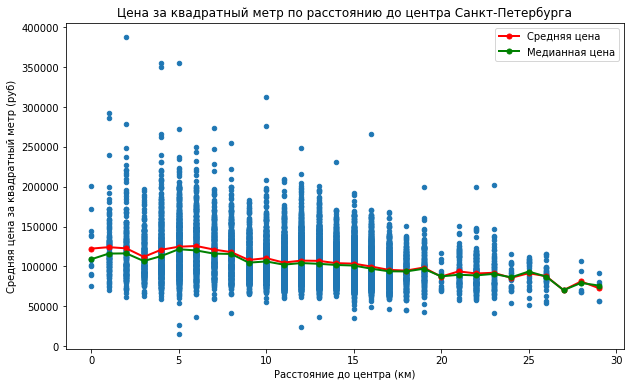

In [75]:
# Построение графика
ax = spb_data.plot(
    kind='scatter',
    x='cityCenters_nearest_km_round',
    y='price_per_m2',
    grid=True,
    figsize=(10, 6),
    xlabel='Расстояние до центра (км)',
    ylabel='Средняя цена за квадратный метр (руб)'
)

# Добавление линии средней цены за квадратный метр
price_by_distance.plot(
    kind='line',
    x='cityCenters_nearest_km_round',
    y='mean',
    color='red',
    ax=ax,
    marker='o',
    linewidth=2,
    markersize=5,
    label='Средняя цена'
)

# Добавление линии медианной цены за квадратный метр
price_by_distance.plot(
    kind='line',
    x='cityCenters_nearest_km_round',
    y='median',
    color='green',
    ax=ax,
    marker='o',
    linewidth=2,
    markersize=5,
    label='Медианная цена'
)

# Настройки графика
ax.set_xlabel('Расстояние до центра (км)')
ax.set_title('Цена за квадратный метр по расстоянию до центра Санкт-Петербурга')

plt.show()

Диаграмма рассеивания показывает зависимость средней стоимости квартир от расстояния до центра Санкт-Петербурга. По горизонтальной оси отложено расстояние до центра города в километрах, а по вертикальной оси — средняя стоимость квартиры в рублях.

На графике видно, что данные точки распределены довольно равномерно, без явной линейной тенденции к увеличению или уменьшению стоимости с увеличением расстояния. Большинство значений сосредоточено в диапазоне от 500,000 до 1,500,000 рублей, что указывает на то, что стоимость квартир в основном находится в этом диапазоне, независимо от расстояния до центра города.

Однако, можно заметить, что количество дорогих квартир уменьшается по мере отдаления от центра. Также линии средней и медианы тоже имеют небольшой тренд к снижению. Это может указывать на слабую отрицательную связь между расстоянием до центра и стоимостью квартир. Более дорогие квартиры чаще встречаются ближе к центру города, что может быть связано с престижностью и востребованностью центральных районов. Таким образом, существует некоторая связь: по мере увеличения расстояния от центра города, количество квартир с высокой стоимостью уменьшается.

Также, немалаважно отметить что линии средней и медианы очень близки к друг-другу, это означает, что распределение данных вокруг центра сравнительно симметрично. Это показывает, что данные хорошо очищены от выбросов.

### Общий вывод

В ходе исследования данных объявлений о продаже недвижимости для построения модели, определяющей рыночную стоимость объектов недвижимости, были выполнены следующие этапы:

**1. Открытие файла и начальная оценка данных**

На этом этапе была проведена предварительная оценка структуры и содержания данных, определены основные параметры и их типы. Также были построены графики распределений для каждого столбца, что позволило лучше понять распределение значений и выявить нужные шаги для анализа.

**2. Предобработка данных**

В рамках предобработки данных были выполнены следующие шаги:
- Приведение названий населённых пунктов к единому формату.
- Обработка пропущенных значений.
- Исправление типов данных некоторых столбцов для корректного анализа.

**3. Добавление расчетных столбцов для дополнительного анализа**

Для углублённого анализа данных были добавлены следующие расчетные столбцы:
- Цена одного квадратного метра.
- День недели публикации объявления.
- Месяц публикации объявления.
- Год публикации объявления.
- Тип этажа квартиры.
- Расстояние до центра города в километрах.

**4. Исследовательский анализ данных**

- Анализ основных параметров и выявление аномалий:
   - Изучены значения большинства столбцов, обнаружены и исправлены аномалии и выбросы с помощью метода межквартильного размаха (IQR).

- Анализ топ-10 населённых пунктов:
   - Проведен анализ 10 населённых пунктов с наибольшим количеством объявлений и изучена вариация средней цены квадратного метра в этих городах.
   - Установлено, что Санкт-Петербург значительно выделяется как по количеству объявлений, так и по средней цене за квадратный метр.
   - Установлено, что средняя цена за квадратный метр варьируется от 72727.67 рублей в Красном Селе до 107405.66 рублей в Санкт-Петербурге.

- Проверка гипотез о влиянии факторов на цену квартир:
   - Анализ зависимости цены от различных факторов показал, что наибольшее влияние на цену квартиры оказывает общая площадь, что подтверждается сильной положительной корреляцией и диаграммой рассеивания.
   - Жилая площадь, площадь кухни и количество комнат также имеют умеренную положительную корреляцию с ценой.
   - День недели, месяц и год публикации объявления практически не влияют на цену квартиры.

**5. Заключение**

Анализ показал, что стоимость квартир в Санкт-Петербурге и окрестностях зависит от ряда факторов. Главным из них является общая площадь объекта. Также было установлено, что:
- Санкт-Петербург имеет самое большое количество объявлений и самую высокую среднюю цену за квадратный метр.
- В других населённых пунктах наблюдается значительное разнообразие в средней цене за квадратный метр, что указывает на различия в уровнях спроса и предложения.

Диаграмма рассеивания со снижающим трендом средней и медианы, показывающая зависимость средней стоимости квартир от расстояния до центра Санкт-Петербурга, подтвердила, что количество дорогих квартир уменьшается с увеличением расстояния от центра города. Это может быть связано с престижностью и востребованностью центральных районов. Таким образом, хотя явной линейной зависимости нет, существует определённая связь между удалённостью от центра и стоимостью квартир: более дорогие квартиры чаще расположены ближе к центру.

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [X]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.